table size = 4096 kB


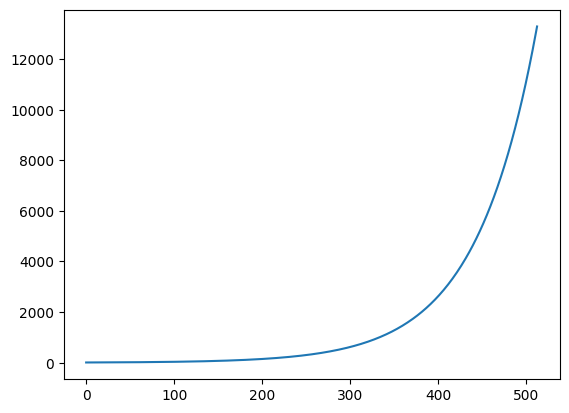

In [1]:
import numpy as np
import matplotlib.pyplot as plt

TABLE_SIZE = 2**9

# таблица же не напрямую а еще через калибровку проходит

print(f"table size = {TABLE_SIZE * 4 * 2} kB")

pitch = np.arange(TABLE_SIZE + 1)
pitch = pitch/(TABLE_SIZE/128)
pitch = 440 * 2**((pitch-69)/12)

plt.plot(pitch)
plt.show()


In [2]:
SAMPLE_RATE = 192000
print(f"sample rate = {SAMPLE_RATE}")
# print(f"norm. inc = {2**32 / SAMPLE_RATE}")
inc = 2**32 / SAMPLE_RATE * pitch

recp = 2**32 / ((np.roll(inc,-1) + inc) / 2)

f = open("scale.h", 'w')
f.write("#include <stdint.h>\n")
f.write("#include \"bsp.h\"\n")
f.write("\n")
f.write("#define SR ((double)SAMPLE_RATE)\n")
f.write("#define FCF ((double)0x100000000LL/SR)\n")
f.write(f"#define TABLE_SIZE {TABLE_SIZE}\n")
f.write("\n")
f.write("static const struct {\n")
f.write("  const int32_t inc;\n")
f.write("  const int32_t recp;\n")
f.write("} table_pitch_inc[TABLE_SIZE + 1] = {\n")

# f.write("#define RCF ((double)0x100000000ULL/(double)SAMPLE_RATE)\n")
for i in range(TABLE_SIZE + 1):
    i_r = i - 1 if i > 0 else 0
    i_i = i if i < TABLE_SIZE else i - 1
    f.write(f"  {{(int32_t)(FCF * {pitch[i_i]} + 0.5), (int32_t)(SR / {pitch[i_r]})}}, // {i}\n")
f.write("};\n")
f.write("\n#undef SR\n")
f.close()

sample rate = 192000


-0x43ead


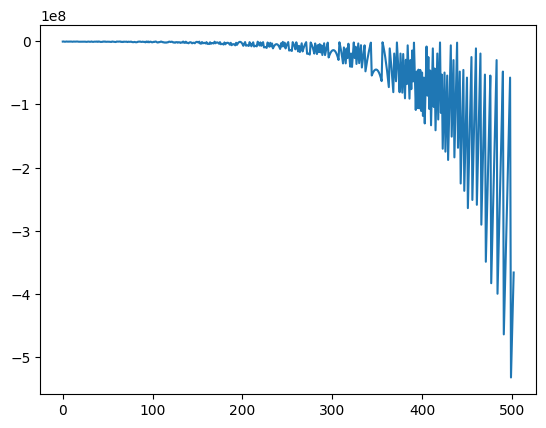

In [3]:
SAMPLE_RATE = 96000
FCF = 2**32/SAMPLE_RATE
inc = (pitch * FCF + 0.5).astype(np.int64)
recp = (SAMPLE_RATE/pitch).astype(np.int64)
# print(hex(recp[0]))
# print(hex(recp[1]))
# print(hex(np.roll(recp,-1)[0]))
# print(hex(np.roll(recp,-1)[1]))
m = (np.roll(inc,-1)*np.roll(recp,-1)-2**32)[5:-5]
# LIM = 15
# m[m>LIM]=LIM
# m[m<-LIM]=-LIM
print(hex(m[10]))
plt.plot(m)
plt.show()